In [209]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [210]:
def read_data():
    train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
    train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
    test_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
    test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')
    return train_images,train_labels,test_images,test_labels

In [211]:
def display_digits(train_images):
    print("Display the gray-scale digits")
    images = []
    columns = 5
    for i in [1,3,16,7,2,0,13,15,17,4]:
        image = np.asarray(train_images[i])
        images.append(image)  
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image,cmap='gray')
    return 1

In [212]:
def preprocessing(images,labels):
    rows,cols = 28,28
    number_class_labels = len(np.unique(labels))
    images = images.reshape(images.shape[0], rows, cols, 1)
    images = images.astype('float32')
    images /= 255
    labels = to_categorical(labels, number_class_labels)
    return images,labels

In [213]:
def cnn_model():
    classifier_model = Sequential()
    classifier_model.add(Convolution2D(32,(3,3), input_shape = (28,28,1),activation = 'relu'))
    classifier_model.add(MaxPooling2D(pool_size = (2,2),strides = 2))
    classifier_model.add(Dropout(0.25))
    classifier_model.add(Flatten())
    
    classifier_model.add(Dense(units = 128, activation = 'relu'))
    classifier_model.add(Dropout(0.5))
    classifier_model.add(Dense(units = 10, activation = 'softmax'))
    classifier_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    print(classifier_model.summary())
    return classifier_model

In [214]:
def training(classifier_model,train_images,train_labels,number_of_iterations):    
    history_of_training = classifier_model.fit(train_images,train_labels, batch_size=25, epochs=number_of_iterations, verbose=1, validation_split = 0.1, shuffle = True)
    return classifier_model, history_of_training.history['loss']

In [215]:
def score_of_model(trained_model,images,labels,type_of_data):
    score = trained_model.evaluate(images,labels,verbose=0)
    print(type_of_data)
    print("Loss: %f" %(score[0]))
    print("Accuracy: %f" %(score[1]*100))
    print()

In [216]:
def plot_learning_curve(loss,epochs):
    x_values = np.array(range(epochs))+1 
    y_values =  np.array(loss)
    plt.plot(x_values, y_values, color = 'red', marker='o', linestyle='solid')
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.title("Learning Curve")
    save_file_name = "learning_curve.png"
    plt.savefig(save_file_name)
    plt.show()

In [ ]:
def accuracy_curve(history)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Accuracy Curve')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Development'], loc='upper left')
    save_file_name = "accuracy_curve.png"
    plt.savefig(save_file_name)
    plt.show()

In [217]:
train_images,train_labels,test_images,test_labels = read_data()
train_image_pr, train_label_pr = preprocessing(train_images,train_labels)
test_image_pr, test_label_pr = preprocessing(test_images,test_labels)
model = cnn_model()
epochs = 10
trained_model,loss = training(model,train_image_pr, train_label_pr,epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               692352    
_________________________________________________________________
dropout_39 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1290      
Total para

Display the gray-scale digits


1

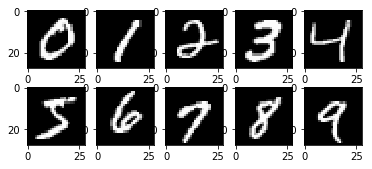

In [205]:
display_digits(train_images)

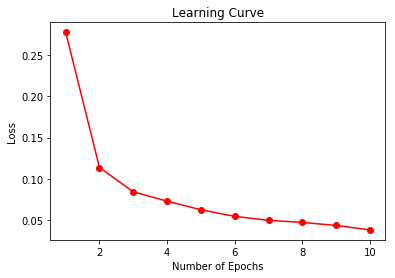

1

In [218]:
plot_learning_curve(loss,epochs)

In [219]:
score_of_model(trained_model,train_image_pr, train_label_pr,"Training Data")
score_of_model(trained_model,test_image_pr, test_label_pr,"Testing Data")

Training Data
Loss: 0.010628
Acuuracy: 99.730000

Testing Data
Loss: 0.038402
Acuuracy: 98.890000



1